In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

In [9]:
df = pd.read_csv("rearranged_train_data.csv")

In [10]:
df.head(5)

,utrip_id,user_id,citiesvisited,citiespertrip,countriesvisited,countriespertrip,internationaltrip,lengthofstay
0,1000027_1,1000027,"[15626, 30628, 60902, 8183]",4,['Gondal'],1,False,8
1,1000033_1,1000033,"[21328, 52089, 27485, 38677]",4,['Cobra Island'],1,False,10
2,1000045_1,1000045,"[58178, 9608, 31817, 36170, 64876, 55128, 36063]",7,"['Carpathia', 'Fook Island', 'Gondal']",3,True,11
3,1000083_1,1000083,"[35160, 14705, 55990, 36063]",4,"['Gondal', 'Osterlich']",2,True,5
4,100008_1,100008,"[12096, 6761, 11306, 65690, 6779]",5,['Kamistan'],1,False,9


In [11]:
df = df.drop(['utrip_id','user_id','citiesvisited','countriesvisited'], axis=1)

In [12]:
le = LabelEncoder() 
df['internationaltrip']= le.fit_transform(df['internationaltrip']) 

In [13]:
df.sample(5)

,citiespertrip,countriespertrip,internationaltrip,lengthofstay
31279,8,2,1,14
176121,5,2,1,9
181845,6,1,0,7
67368,1,1,0,5
8932,5,1,0,9


In [14]:
!pip install pandas-profiling==2.7.1

In [15]:
import seaborn as sns
from pandas_profiling import ProfileReport

In [16]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.isnull().sum()

citiespertrip        0
countriespertrip     0
internationaltrip    0
lengthofstay         0
dtype: int64

In [24]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
Y = df['lengthofstay'] #Choose Target response
X = df.drop(['lengthofstay'],axis=1)

In [22]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [25]:
RFRegressor = RandomForestRegressor(n_estimators=200)

In [26]:
RFRegressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
#Prediction
Predict_Y = RFRegressor.predict(X_test)

In [28]:
#RMSE Result
rmse = mean_squared_error(Y_test,Predict_Y)
print('Root Mean Squared Error: %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(Y_test, Predict_Y))
#print('R^2 Prediction Score: %.4f'% mScore)

Root Mean Squared Error: 4.14
Test Variance Score: 0.2299


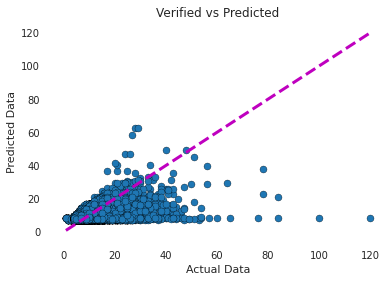

In [29]:
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()